In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

read the csv file

In [65]:
df = pd.read_csv("advertising.csv")

##### displayed top 5 rows of the data

In [66]:
df.head()

,TV_Advertising,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


##### displayed bottom 5 rows of the data

In [67]:
df.tail()

,TV_Advertising,Sales
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5
199,232.1,18.4


##### display info about the dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TV_Advertising  200 non-null    float64
 1   Sales           200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


##### displayed rows and columns

In [69]:
df.shape

(200, 2)

##### displayed statistical info about the DataSet

In [70]:
df.describe()

,TV_Advertising,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


##### created separate DataFrames for input fetaure and target feature

In [78]:
X = df['TV_Advertising'].values
y = df['Sales'].values

##### Checked for outliers

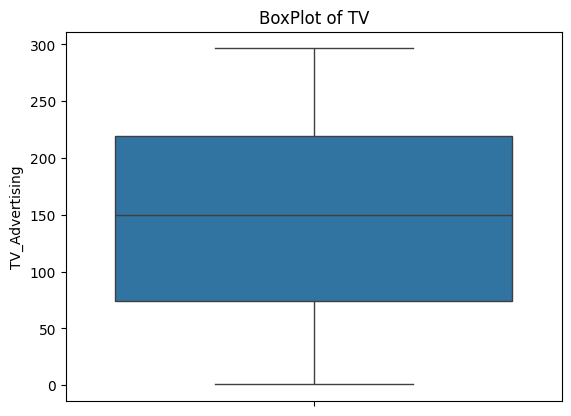

In [79]:
sns.boxplot(df['TV_Advertising'])
plt.title("BoxPlot of TV")
plt.show()

##### Displayed a scatter plot to get the idea of how data looks between Sales and TV_advertising

Text(0, 0.5, 'Sales')

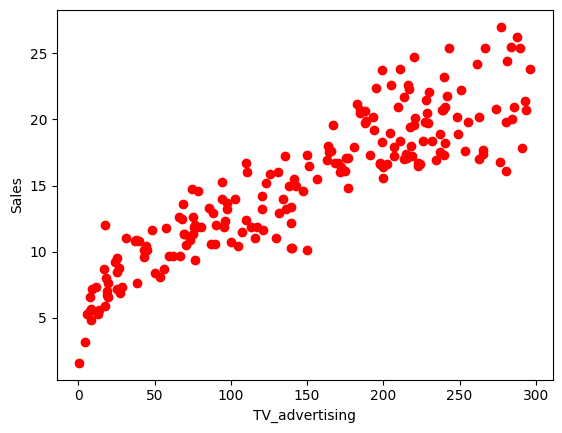

In [81]:
plt.scatter(X, y, color = 'red', label = 'scatter_plot')
plt.xlabel('TV_advertising')
plt.ylabel('Sales')

##### before this x and y was 1D...
##### To make it 2D I applied following code

##### -1 basically tells python to figure out the no. of rows by itself and 
#####  1 tells that make no. of columns 1

In [86]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

imported required models

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##### divided the data for training and testing

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

displayed the dimensions of training and testing data

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140, 1)
(60, 1)


##### initalized our model 

In [89]:
lm = LinearRegression()

In [90]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### from here I got slope and intercept of the line
##### a (slope) : 0.05616295
##### c (intercept) : 6.86704644

In [95]:
print(lm.coef_)
print(lm.intercept_)

[[0.05616295]]
[6.86704644]


In [98]:
lm.predict(X)[:5]

array([[19.79014122],
       [ 9.36629771],
       [ 7.83304918],
       [15.37573336],
       [17.02130779]])

##### plotted regression line

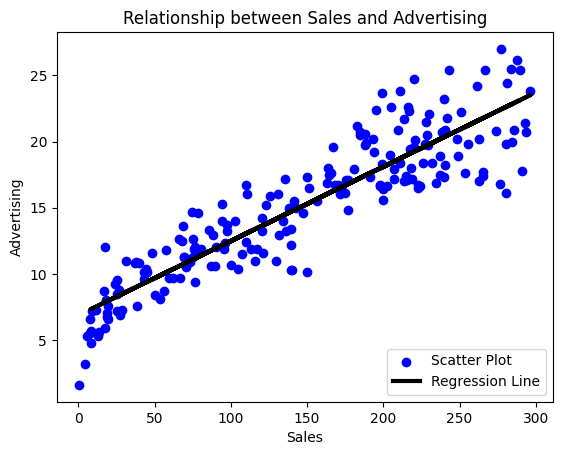

In [99]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

##### checking root mean square error... 
##### smaller the better

In [101]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

2.456385630558107

##### checked the R^2 value
##### higher the better

In [102]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7538612742063846

##### residual error = (actual value) - (predicted value)
##### we have done it for both training and testing data
##### it is random means no patterns like curve hence linear regression is better for this dataset
##### most points are close to the 0 line hence model is not biased

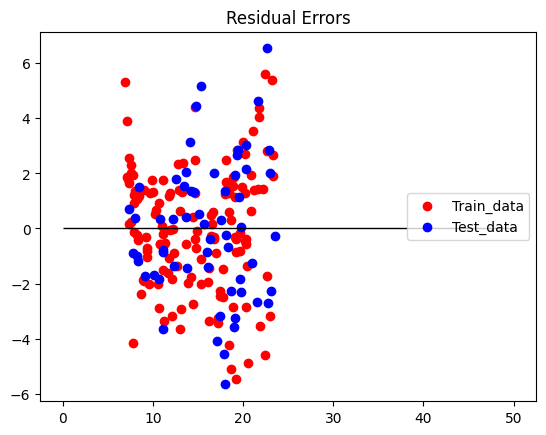

In [104]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train_data' )
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test_data' )
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 1, color = 'black')
plt.title("Residual Errors")
plt.legend(loc = 5)
plt.show()

In [108]:
lm.score(X_train, y_train)

0.8300783786269974

In [107]:
lm.score(X_test, y_test)

0.7538612742063846

##### both score are close together means no underfitting or overfitting